In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import requests

In [6]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
s=requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))
#df.keys()
df.rename(columns={"Country/Region" : "Country", "Province/State" : "Province"}, inplace=True)
df_italy = df[df['Country'].str.match('Italy')]
df_france = df[df['Country'].str.match('France')]
df_germany = df[df['Country'].str.match('Germany')]
df_china = df[df['Country'].str.match('Mainland China')]
df_china_total = df_china.sum(numeric_only=True)
cases_china = []
for i in range(len(df_china_total)):
    if i > 1:
        cases_china.append(df_china_total.iloc[i])

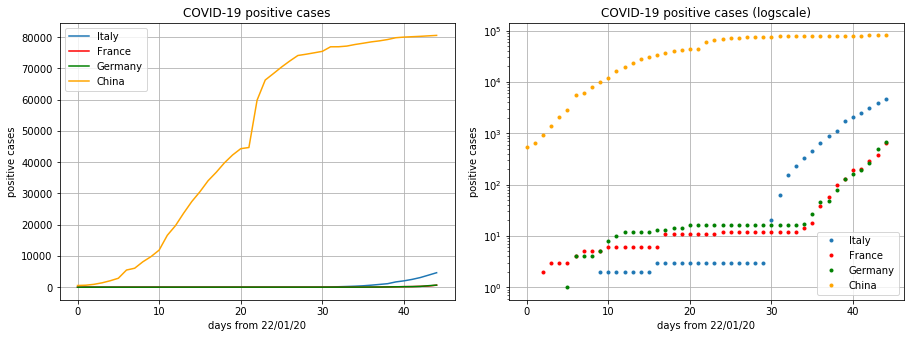

In [7]:
cases_italy = df_italy.loc[:, '1/22/20':].values[0]
cases_france = df_france.loc[:, '1/22/20':].values[0]
cases_germany = df_germany.loc[:, '1/22/20':].values[0]
time = range(len(cases_italy))
plt.figure(figsize=[12.8, 4.8])
plt.subplot(1,2,1)
plt.plot(time, cases_italy, label="Italy")
plt.plot(time, cases_france, color="red", label="France")
plt.plot(time, cases_germany, color="green", label="Germany")
plt.plot(time, cases_china, color="orange", label="China")
plt.title("COVID-19 positive cases")
plt.xlabel("days from 22/01/20")
plt.ylabel("positive cases")
plt.legend(loc="best")
plt.grid()
plt.subplot(1,2,2)
plt.plot(time, cases_italy, label="Italy", marker='.', linestyle='None')
plt.plot(time, cases_france, color="red", label="France", marker='.', linestyle='None')
plt.plot(time, cases_germany, color="green", label="Germany", marker='.', linestyle='None')
plt.plot(time, cases_china, color="orange", label="China", marker='.', linestyle='None')
plt.yscale("log")
plt.title("COVID-19 positive cases (logscale)")
plt.xlabel("days from 22/01/20")
plt.ylabel("positive cases")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()